# Solving the n-Queens Problem using Local Search

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]


## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


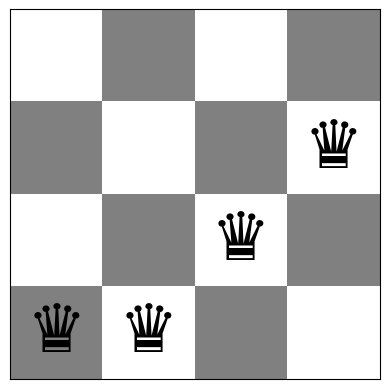

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [4]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


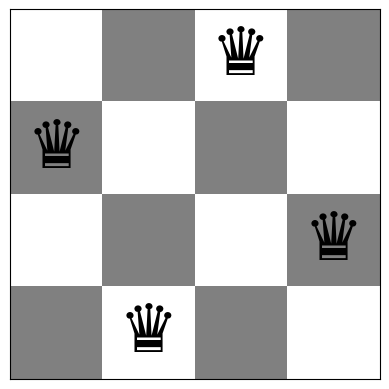

In [5]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

Initial board (conflicts=8): [4 4 0 1 7 1 7 1]

Step 1: conflicts=5
Step 2: conflicts=3
Step 3: conflicts=2
Step 4: conflicts=1
Step 5: conflicts=0

Found solution!
Board with 0 conflicts.


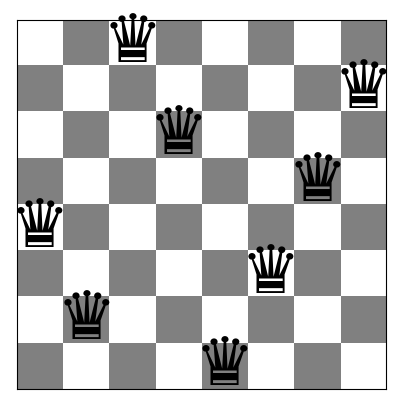

Final board: [4 6 0 2 7 5 3 1]
Final conflicts: 0


In [6]:
# Code and description go here
def steepest_ascent_hill_climbing(n, max_steps=1000, record_history=False):
    """
    Perform steepest-ascent hill climbing for n-Queens.
    Always move to the neighbor with the fewest conflicts.
    Stop when no better neighbor exists.
    """
    board = random_board(n)
    current_conf = conflicts(board)
    history = [current_conf] if record_history else None

    print(f"Initial board (conflicts={current_conf}): {board}\n")

    for step in range(max_steps):
        # Evaluate all possible local moves
        best_board = np.copy(board)
        best_conf = current_conf
        improved = False

        for col in range(n):
            original_row = board[col]
            for row in range(n):
                if row == original_row:
                    continue
                board[col] = row
                new_conf = conflicts(board)
                # Choose the best (steepest descent)
                if new_conf < best_conf:
                    best_conf = new_conf
                    best_board = np.copy(board)
                    improved = True
            board[col] = original_row  # reset after trying all rows

        board = best_board
        current_conf = best_conf

        print(f"Step {step+1}: conflicts={current_conf}")

        # Stop if no improvement
        if not improved:
            print("\nReached local minimum.")
            break

        # Stop early if solution found
        if current_conf == 0:
            print("\nFound solution!")
            break
        if record_history:
            history.append(current_conf)
    if record_history:
        return board, current_conf, history
    return board, current_conf

# Example for n=8
final_board, final_conf = steepest_ascent_hill_climbing(8)
show_board(final_board)
print(f"Final board: {final_board}")
print(f"Final conflicts: {final_conf}")

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Initial board (conflicts=7): [2 0 0 4 5 0 1 7]

Step 1: conflicts=6
Step 2: conflicts=5
Step 3: conflicts=4
Step 4: conflicts=3
Step 5: conflicts=2
Step 6: conflicts=0

Found solution!
Board with 0 conflicts.


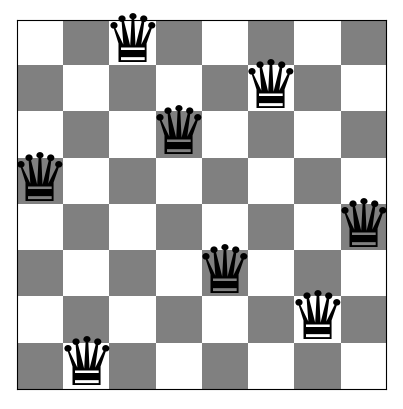

Final board: [3 7 0 2 5 1 6 4]
Final conflicts: 0


In [8]:
# Code and description go here
import numpy as np
import random

def stochastic_hill_climbing(n, max_steps=1000, record_history=False):
    """
    Stochastic Hill Climbing for n-Queens.
    Randomly chooses one improving move at each step.
    """
    board = random_board(n)
    current_conf = conflicts(board)
    history = [current_conf] if record_history else None

    print(f"Initial board (conflicts={current_conf}): {board}\n")

    for step in range(max_steps):
        neighbors = []

        # Generate all neighbors
        for col in range(n):
            original_row = board[col]
            for row in range(n):
                if row == original_row:
                    continue
                board[col] = row
                new_conf = conflicts(board)
                if new_conf < current_conf:
                    neighbors.append((np.copy(board), new_conf))
            board[col] = original_row  # reset

        # If no improving moves, stop
        if not neighbors:
            print("\nReached local optimum.")
            break

        # Randomly choose one improving neighbor
        next_board, next_conf = random.choice(neighbors)
        board = next_board
        current_conf = next_conf

        print(f"Step {step+1}: conflicts={current_conf}")

        # Stop early if found solution
        if current_conf == 0:
            print("\nFound solution!")
            break
        if record_history:
            history.append(current_conf)
    if record_history:
        return board, current_conf, history
    return board, current_conf

# Example run for n = 8
final_board, final_conf = stochastic_hill_climbing(8)
show_board(final_board)
print(f"Final board: {final_board}")
print(f"Final conflicts: {final_conf}")

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Initial board (conflicts=7): [4, 2, 4, 3, 4, 2, 5, 0]

Step 200, conflicts=2

Stopped after 200 failed attempts.

Final conflicts=2 after 259 steps.
Board with 2 conflicts.


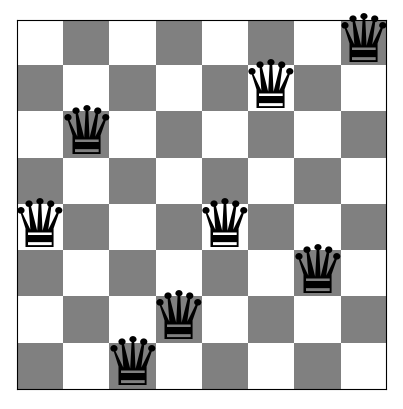

Final board: [4, 2, 7, 6, 4, 1, 5, 0]
Final conflicts: 2


In [9]:
# Code and description go here
def first_choice_hill_climbing(n, move_operator=None, max_steps=10000, no_improve_limit=200, record_history=False):
    """
    First-choice (Stochastic) Hill Climbing for n-Queens.
    Generates only one random neighbor per iteration and accepts if better.

    Parameters:
        n: kích thước bàn cờ
        max_steps: giới hạn số bước tối đa
        no_improve_limit: số lần thử không cải thiện trước khi dừng
    """

    # board = random_board(n)
    board = [random.randrange(n) for _ in range(n)]
    current_conf = conflicts(board)
    print(f"Initial board (conflicts={current_conf}): {board}\n")

    no_improve_count = 0
    step = 0
    history = [current_conf] if record_history else None

    while step < max_steps and current_conf > 0:
        step += 1

        if move_operator:
            # dùng operator tùy chọn
            new_board = move_operator(board)
        else:
            # move ngẫu nhiên mặc định
            new_board = board.copy()
            col = random.randint(0, n - 1)
            new_row = random.randint(0, n - 1)
            while new_row == new_board[col]:
                new_row = random.randint(0, n - 1)
            new_board[col] = new_row

        # Randomly pick a column and a different row
        col = random.randint(0, n - 1)
        new_row = random.randint(0, n - 1)
        while new_row == board[col]:
            new_row = random.randint(0, n - 1)

        # Try this move
        old_row = board[col]
        board[col] = new_row
        new_conf = conflicts(board)

        # Accept if better
        if new_conf < current_conf:
            current_conf = new_conf
            no_improve_count = 0  # reset counter
        else:
            board[col] = old_row  # revert
            no_improve_count += 1
        if record_history:
          history.append(current_conf)

        # If too many non-improving tries, stop
        if no_improve_count >= no_improve_limit:
            print(f"\nStopped after {no_improve_count} failed attempts.")
            break

        # Print progress occasionally
        if step % 200 == 0:
            print(f"Step {step}, conflicts={current_conf}")

    print(f"\nFinal conflicts={current_conf} after {step} steps.")

    if record_history:
      return board, current_conf, history
    return board, current_conf

# Example run for n = 8
final_board, final_conf = first_choice_hill_climbing(8)
show_board(final_board)
print(f"Final board: {final_board}")
print(f"Final conflicts: {final_conf}")

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.


=== Restart 1 ===
Initial board (conflicts=8): [5, 5, 7, 6, 0, 7, 2, 2]

Step 200, conflicts=2

Stopped after 200 failed attempts.

Final conflicts=2 after 207 steps.

=== Restart 2 ===
Initial board (conflicts=11): [6, 2, 3, 1, 2, 6, 5, 6]

Step 200, conflicts=1

Stopped after 200 failed attempts.

Final conflicts=1 after 251 steps.

=== Restart 3 ===
Initial board (conflicts=7): [4, 1, 6, 5, 2, 4, 6, 7]

Step 200, conflicts=2

Stopped after 200 failed attempts.

Final conflicts=2 after 257 steps.

=== Restart 4 ===
Initial board (conflicts=10): [5, 0, 2, 3, 3, 5, 2, 7]

Step 200, conflicts=2

Stopped after 200 failed attempts.

Final conflicts=2 after 214 steps.

=== Restart 5 ===
Initial board (conflicts=7): [5, 0, 6, 3, 4, 6, 2, 7]

Step 200, conflicts=3

Stopped after 200 failed attempts.

Final conflicts=3 after 213 steps.

=== Restart 6 ===
Initial board (conflicts=10): [1, 2, 0, 4, 2, 4, 4, 7]

Step 200, conflicts=1

Stopped after 200 failed attempts.

Final conflicts=1 after 

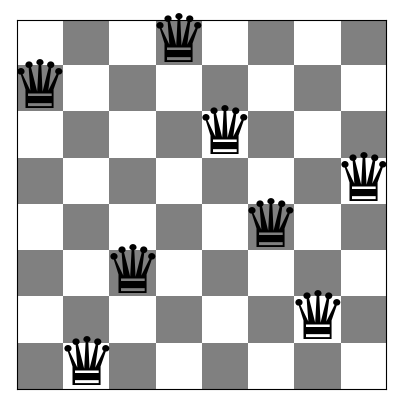

In [10]:
# Code and description go here
def random_restart_hill_climbing(search_fn, n, restarts=100, record_history=False):
    """
    Random Restart Hill Climbing
    Runs a given hill climbing function multiple times with random initial boards.

    Parameters:
        search_fn: hàm tìm kiếm (hill climbing) cần chạy
        n: kích thước bàn cờ
        restarts: số lần khởi động lại tối đa
    """

    best_board = None
    best_conf = float('inf')
    history = [current_conf] if record_history else None

    for i in range(1, restarts + 1):
        print(f"\n=== Restart {i} ===")
        board, conf, *_ = search_fn(n)

        if conf < best_conf:
            best_conf = conf
            best_board = board

        if best_conf == 0:
            print("\nFound global solution!")
            break
        if record_history:
            history.append(current_conf)

    if record_history:
        return board, current_conf, history

    print(f"\nBest conflicts after {i} restarts: {best_conf}")
    return best_board, best_conf

# Steepest-Ascent Hill Climbing
# best_board, best_conf = random_restart_hill_climbing(steepest_ascent_hill_climbing, 8)
# show_board(best_board)
# print(f"Best board: {best_board}")
# print(f"Best conflicts: {best_conf}")

# Stochastic Hill Climbing
# best_board, best_conf = random_restart_hill_climbing(stochastic_hill_climbing, 8)
# show_board(best_board)

# First-Choice Hill Climbing
best_board, best_conf = random_restart_hill_climbing(first_choice_hill_climbing, 8)
show_board(best_board)


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progrsses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

Board with 0 conflicts.


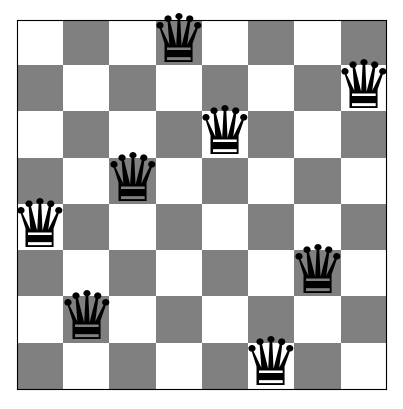

Final board: [4 6 3 0 2 7 5 1]
Final conflicts: 0


In [11]:
# Code and description go here
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def simulated_annealing(n, T0=100, alpha=0.95, max_steps=10000, record_history=False):
    """
    Simulated Annealing algorithm for the n-Queens problem.

    Parameters:
        n: kích thước bàn cờ
        T0: nhiệt độ khởi đầu
        alpha: hệ số làm nguội (0 < alpha < 1)
        max_steps: số bước tối đa
    """
    board = random_board(n)
    current_conf = conflicts(board)
    best_board = np.copy(board)
    best_conf = current_conf

    T = T0
    history = [current_conf] if record_history else None

    for step in range(max_steps):
        if current_conf == 0:
            break

        # Random neighbor: chọn 1 cột và đổi hàng
        col = random.randint(0, n - 1)
        new_row = random.randint(0, n - 1)
        while new_row == board[col]:
            new_row = random.randint(0, n - 1)

        old_row = board[col]
        board[col] = new_row
        new_conf = conflicts(board)

        deltaE = new_conf - current_conf

        # Điều kiện chấp nhận
        if deltaE < 0 or random.random() < math.exp(-deltaE / T):
            current_conf = new_conf
        else:
            board[col] = old_row  # khôi phục

        # Cập nhật nghiệm tốt nhất
        if current_conf < best_conf:
            best_conf = current_conf
            best_board = np.copy(board)
        if record_history:
            history.append(current_conf)

        # Giảm nhiệt độ
        T *= alpha

        # Ngừng nếu nhiệt độ quá thấp
        if T < 1e-5:
            break
    if record_history:
        return board, current_conf, history

    return best_board, best_conf

best_board, best_conf = simulated_annealing(8, T0=100, alpha=0.97)
show_board(best_board)
print(f"Final board: {best_board}")
print(f"Final conflicts: {best_conf}")

## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

In [12]:
import numpy as np, time, pandas as pd

# ==== Bộ đo lường hiệu năng ====
def evaluate_algorithm(algorithm_func, n, trials=100):
    """
    Chạy thử 'trials' lần để tính trung bình:
    - Thời gian chạy
    - Số xung đột
    - Tỷ lệ nghiệm tối ưu
    """
    runtimes, conflicts_list = [], []
    optimal_count = 0

    for _ in range(trials):
        start = time.time()
        board, conf = algorithm_func(n)
        end = time.time()

        runtimes.append(end - start)
        conflicts_list.append(conf)
        if conf == 0:
            optimal_count += 1

    return (np.mean(runtimes),
            np.mean(conflicts_list),
            100 * optimal_count / trials)


In [13]:
algorithms = {
    "Steepest asc. HC": steepest_ascent_hill_climbing,
    "Stochastic HC 1": stochastic_hill_climbing,
    "Stochastic HC 2": first_choice_hill_climbing,
    "Simulated Annealing": simulated_annealing
}

results = []

for n in [4, 8]:
    for name, func in algorithms.items():
        print(f"▶ Running {name} on board {n}×{n} ...")
        avg_time, avg_conf, success_rate = evaluate_algorithm(func, n, trials=100)
        results.append((name, n, avg_time, avg_conf, success_rate))


▶ Running Steepest asc. HC on board 4×4 ...
Initial board (conflicts=4): [2 2 2 3]

Step 1: conflicts=2
Step 2: conflicts=1
Step 3: conflicts=1

Reached local minimum.
Initial board (conflicts=3): [3 3 0 1]

Step 1: conflicts=1
Step 2: conflicts=0

Found solution!
Initial board (conflicts=3): [3 0 3 2]

Step 1: conflicts=1
Step 2: conflicts=0

Found solution!
Initial board (conflicts=3): [3 0 1 3]

Step 1: conflicts=1
Step 2: conflicts=1

Reached local minimum.
Initial board (conflicts=4): [3 3 2 1]

Step 1: conflicts=1
Step 2: conflicts=1

Reached local minimum.
Initial board (conflicts=2): [2 3 3 0]

Step 1: conflicts=1
Step 2: conflicts=0

Found solution!
Initial board (conflicts=3): [2 3 2 0]

Step 1: conflicts=1
Step 2: conflicts=1

Reached local minimum.
Initial board (conflicts=2): [1 3 1 0]

Step 1: conflicts=1
Step 2: conflicts=0

Found solution!
Initial board (conflicts=3): [0 0 1 1]

Step 1: conflicts=1
Step 2: conflicts=0

Found solution!
Initial board (conflicts=2): [1 3 1

In [14]:
df = pd.DataFrame(results, columns=[
    "Algorithm", "Board Size", "Avg. Run Time (s)", "Avg. Conflicts", "% Optimal Solutions"
])

df.style.format({
    "Avg. Run Time (s)": "{:.4f}",
    "Avg. Conflicts": "{:.2f}",
    "% Optimal Solutions": "{:.1f}%"
})

,Algorithm,Board Size,Avg. Run Time (s),Avg. Conflicts,% Optimal Solutions
0,Steepest asc. HC,4,0.0003,0.54,48.0%
1,Stochastic HC 1,4,0.0003,0.71,38.0%
2,Stochastic HC 2,4,0.0009,0.82,29.0%
3,Simulated Annealing,4,0.0006,0.00,100.0%
4,Steepest asc. HC,8,0.0024,1.23,12.0%
5,Stochastic HC 1,8,0.0033,1.24,12.0%
6,Stochastic HC 2,8,0.0019,1.27,17.0%
7,Simulated Annealing,8,0.0031,0.80,28.0%


### Algorithm Convergence

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

Initial board (conflicts=14): [7 6 4 7 7 7 7 4]

Step 1: conflicts=9
Step 2: conflicts=5
Step 3: conflicts=3
Step 4: conflicts=2
Step 5: conflicts=2

Reached local minimum.
Initial board (conflicts=6): [0 3 5 3 2 6 1 2]

Step 1: conflicts=5
Step 2: conflicts=4
Step 3: conflicts=3
Step 4: conflicts=2

Reached local optimum.
Initial board (conflicts=3): [6, 2, 4, 0, 0, 3, 5, 7]


Final conflicts=0 after 45 steps.


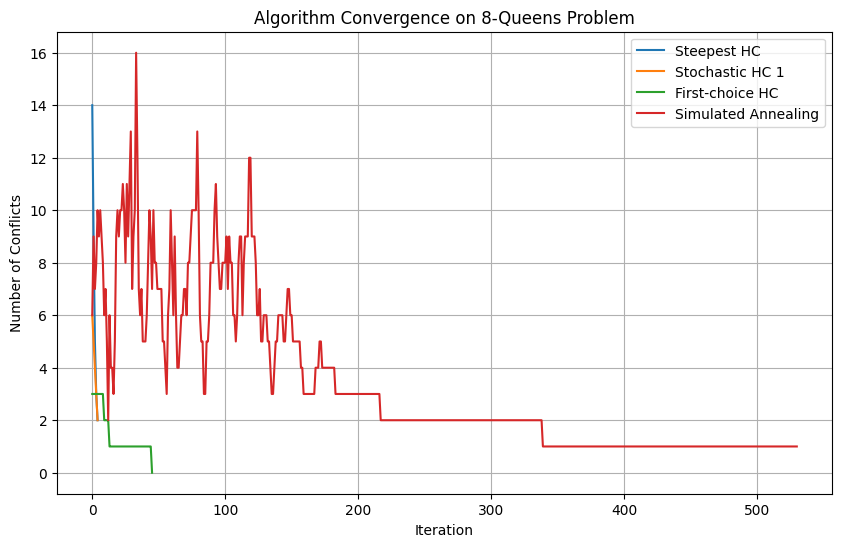

In [15]:
import matplotlib.pyplot as plt

n = 8
histories = {}

# Lưu lại lịch sử hội tụ
_, _, h1 = steepest_ascent_hill_climbing(n, record_history=True)
_, _, h2 = stochastic_hill_climbing(n, record_history=True)
_, _, h3 = first_choice_hill_climbing(n, record_history=True)
_, _, h4 = simulated_annealing(n, T0=100, alpha=0.97, record_history=True)

histories["Steepest HC"] = h1
histories["Stochastic HC 1"] = h2
histories["First-choice HC"] = h3
histories["Simulated Annealing"] = h4

# Vẽ
plt.figure(figsize=(10,6))
for name, h in histories.items():
    plt.plot(range(len(h)), h, label=name)

plt.xlabel("Iteration")
plt.ylabel("Number of Conflicts")
plt.title("Algorithm Convergence on 8-Queens Problem")
plt.legend()
plt.grid(True)
plt.show()


### Problem Size Scalability

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

Measuring Steepest HC for n=4 (trials=50) ...


Initial board (conflicts=2): [2 0 2 1]

Step 1: conflicts=0

Found solution!
Initial board (conflicts=3): [1 2 0 1]

Step 1: conflicts=1
Step 2: conflicts=1

Reached local minimum.
Initial board (conflicts=5): [0 1 0 0]

Step 1: conflicts=2
Step 2: conflicts=1
Step 3: conflicts=1

Reached local minimum.
Initial board (conflicts=1): [2 0 3 0]

Step 1: conflicts=0

Found solution!
Initial board (conflicts=2): [2 0 1 1]

Step 1: conflicts=0

Found solution!
Initial board (conflicts=4): [0 0 2 3]

Step 1: conflicts=2
Step 2: conflicts=2

Reached local minimum.
Initial board (conflicts=5): [2 1 2 3]

Step 1: conflicts=2
Step 2: conflicts=1
Step 3: conflicts=1

Reached local minimum.
Initial board (conflicts=4): [2 1 0 0]

Step 1: conflicts=1
Step 2: conflicts=1

Reached local minimum.
Initial board (conflicts=3): [1 1 0 3]

Step 1: conflicts=1
Step 2: conflicts=1

Reached local minimum.
Initial board (conflicts=3): [0 0 3 3]

Step 1: conflicts=1
Step 2: conflicts=0

Found solution!
Initial 

Algorithm,First-choice HC,Steepest HC
n,,
4,0.001793,0.000319
8,0.005039,0.002404
12,0.008715,0.009721
16,0.014310,0.029462
20,0.015496,0.086135


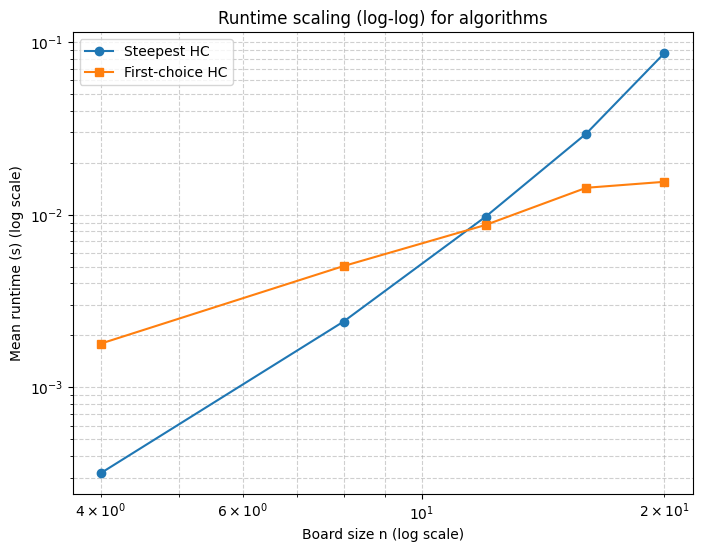

Steepest HC: estimated exponent (slope) = 3.429  => runtime ≈ 2.320e-06 * n^3.429
First-choice HC: estimated exponent (slope) = 1.391  => runtime ≈ 2.708e-04 * n^1.391


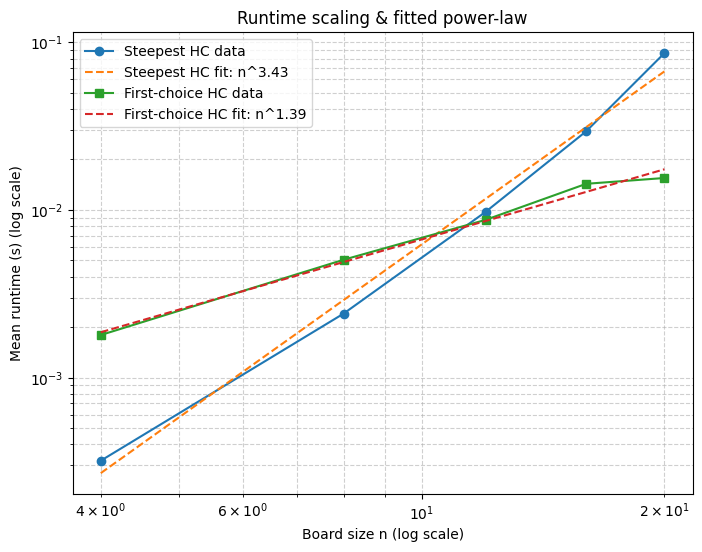

In [16]:
# Problem Size Scalability: runtime vs n (log-log) and empirical exponent estimate
import time, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean, median

# ---------- Assumptions ----------
# Các hàm thuật toán đã có trong notebook và trả về (board, conf):
# - steepest_ascent_hc(n, record_history=False)
# - first_choice_hill_climbing(n, max_steps=10000, no_improve_limit=200, record_history=False)
# Bạn có thể thay tên hàm nếu khác.
# ---------------------------------

def measure_runtime(alg_func, n, trials=5, **kwargs):
    """Measure average runtime (seconds) of alg_func(n, **kwargs) over 'trials' runs.
       Returns mean runtime and list of runtimes."""
    runtimes = []
    for _ in range(trials):
        t0 = time.perf_counter()
        # call algorithm (ensure it returns only board, conf when record_history=False)
        res = alg_func(n, **kwargs)
        t1 = time.perf_counter()
        # alg may return (board, conf) or (board, conf, history) -> handle both
        # but we only time the call, result unpacking not needed here
        runtimes.append(t1 - t0)
    return float(np.mean(runtimes)), runtimes

# Configure experiment
ns = [4, 8, 12, 16, 20]          # sizes to test
trials_small = 50                # more trials for small n for stability
trials_large = 10                # fewer trials for larger n to save time
# choose algorithms to compare
algorithms = {
    "Steepest HC": lambda n: steepest_ascent_hill_climbing(n, record_history=False),
    "First-choice HC": lambda n: first_choice_hill_climbing(n, max_steps=20000, no_improve_limit=500, record_history=False)
    # optionally add simulated annealing:
    # "Simulated Annealing": lambda n: simulated_annealing(n, T0=100, alpha=0.97, max_steps=10000, record_history=False)
}

# Run measurements
results = []
for name, func in algorithms.items():
    mean_runtimes = []
    std_runtimes = []
    for n in ns:
        # choose trial count adaptively
        trials = trials_small if n <= 8 else trials_large
        print(f"Measuring {name} for n={n} (trials={trials}) ...", flush=True)
        avg_rt, runs = measure_runtime(func, n, trials=trials)
        mean_runtimes.append(avg_rt)
        std_runtimes.append(np.std(runs))
        results.append({
            "Algorithm": name,
            "n": n,
            "mean_runtime": avg_rt,
            "std_runtime": np.std(runs),
            "raw_runs": runs
        })

# Convert to DataFrame
df = pd.DataFrame(results)
display(df.pivot(index='n', columns='Algorithm', values='mean_runtime'))

# ---------- Log-Log Plot ----------
plt.figure(figsize=(8,6))
markers = {'Steepest HC':'o', 'First-choice HC':'s'}
for name in algorithms.keys():
    y = df[df['Algorithm'] == name].sort_values('n')['mean_runtime'].values
    x = np.array(ns)
    plt.plot(x, y, marker=markers.get(name,'o'), label=name)
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Board size n (log scale)')
plt.ylabel('Mean runtime (s) (log scale)')
plt.title('Runtime scaling (log-log) for algorithms')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.show()

# ---------- Empirical exponent estimation ----------
estimates = []
for name in algorithms.keys():
    df_sub = df[df['Algorithm'] == name].sort_values('n')
    x = np.log(df_sub['n'].values)
    y = np.log(df_sub['mean_runtime'].values)
    # linear fit in log-log space: y = a*x + b => exponent ~ a
    a, b = np.polyfit(x, y, 1)
    estimates.append((name, a, math.exp(b)))
    print(f"{name}: estimated exponent (slope) = {a:.3f}  => runtime ≈ {math.exp(b):.3e} * n^{a:.3f}")

# Optional: show fit lines on the plot
plt.figure(figsize=(8,6))
for name in algorithms.keys():
    df_sub = df[df['Algorithm'] == name].sort_values('n')
    x = np.array(df_sub['n'].values, dtype=float)
    y = np.array(df_sub['mean_runtime'].values, dtype=float)
    logx = np.log(x)
    a, b = np.polyfit(logx, np.log(y), 1)
    fit_y = np.exp(b) * x**a
    plt.plot(x, y, marker=markers.get(name,'o'), label=f"{name} data")
    plt.plot(x, fit_y, linestyle='--', label=f"{name} fit: n^{a:.2f}")
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Board size n (log scale)')
plt.ylabel('Mean runtime (s) (log scale)')
plt.title('Runtime scaling & fitted power-law')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.show()


## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your Stochastic Hill Climbing 2 implementation with each move operator 100 times
For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?

In [17]:
# Code and description go here
import random

def single_step_move(board):
    """Move one queen only one step up or down (if valid)."""
    n = len(board)
    col = random.randrange(n)
    direction = random.choice([-1, 1])
    new_row = board[col] + direction
    if 0 <= new_row < n:
        new_board = board.copy()
        new_board[col] = new_row
        return new_board
    else:
        return board  # invalid move => no change

def column_swap(board):
    """Swap two columns' queen rows."""
    n = len(board)
    c1, c2 = random.sample(range(n), 2)
    new_board = board.copy()
    new_board[c1], new_board[c2] = new_board[c2], new_board[c1]
    return new_board

def dual_queen_move(board):
    """Move two queens to new rows."""
    n = len(board)
    cols = random.sample(range(n), 2)
    new_board = board.copy()
    for c in cols:
        new_row = random.choice([r for r in range(n) if r != board[c]])
        new_board[c] = new_row
    return new_board

def adaptive_move(board):
    """Adaptive move based on conflict density."""
    n = len(board)
    # compute total conflicts and average per queen
    total_conf = conflicts(board)
    avg_conf = total_conf / n
    if avg_conf > 2:
        # stuck or bad position => use strong move
        move_func = random.choice([dual_queen_move, column_swap])
    elif avg_conf > 0.5:
        # moderate -> medium move
        move_func = random.choice([column_swap, single_step_move])
    else:
        # near optimum -> small tweak
        move_func = single_step_move
    return move_func(board)


Running Single-step on 8-Queens...
Initial board (conflicts=6): [0, 6, 3, 6, 7, 6, 2, 5]

Step 200, conflicts=1

Stopped after 200 failed attempts.

Final conflicts=1 after 231 steps.
Initial board (conflicts=7): [1, 3, 7, 7, 4, 2, 3, 4]

Step 200, conflicts=1

Stopped after 200 failed attempts.

Final conflicts=1 after 281 steps.
Initial board (conflicts=7): [4, 5, 1, 7, 1, 0, 3, 7]

Step 200, conflicts=1

Stopped after 200 failed attempts.

Final conflicts=1 after 207 steps.
Initial board (conflicts=7): [1, 2, 2, 2, 7, 5, 0, 1]

Step 200, conflicts=1

Stopped after 200 failed attempts.

Final conflicts=1 after 257 steps.
Initial board (conflicts=10): [4, 5, 7, 5, 7, 7, 3, 4]

Step 200, conflicts=1

Stopped after 200 failed attempts.

Final conflicts=1 after 265 steps.
Initial board (conflicts=7): [5, 1, 1, 4, 5, 0, 3, 0]

Step 200, conflicts=1

Stopped after 200 failed attempts.

Final conflicts=1 after 216 steps.
Initial board (conflicts=5): [2, 5, 3, 6, 4, 6, 2, 5]


Final conflict

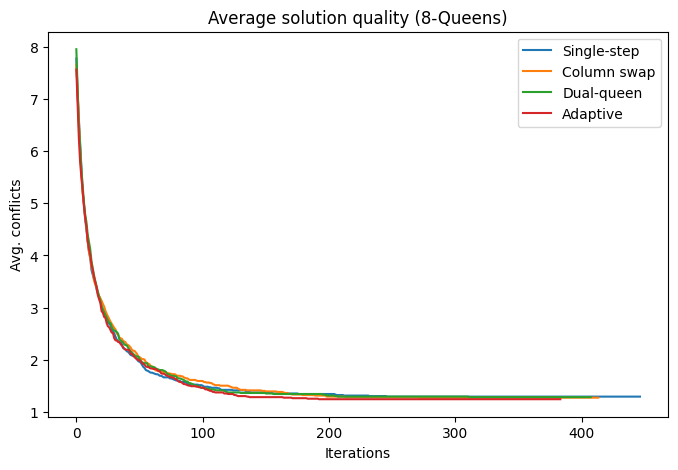

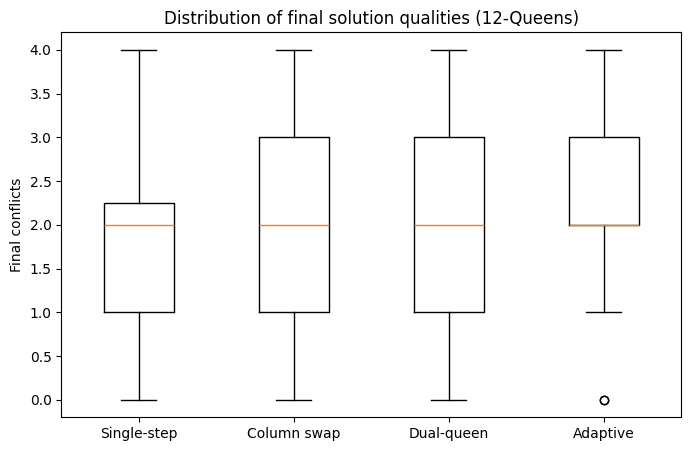

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time

operators = {
    "Single-step": single_step_move,
    "Column swap": column_swap,
    "Dual-queen": dual_queen_move,
    "Adaptive": adaptive_move
}

def experiment(n, trials=100):
    results = {}
    for name, op in operators.items():
        print(f"Running {name} on {n}-Queens...")
        histories = []
        finals = []
        times = []
        successes = 0
        for _ in range(trials):
            t0 = time.perf_counter()
            board, conf, hist = first_choice_hill_climbing(n, op, record_history=True)
            t1 = time.perf_counter()
            times.append(t1-t0)
            histories.append(hist)
            finals.append(conf)
            if conf == 0: successes += 1
        avg_hist = np.mean([np.pad(h, (0, max(map(len,histories))-len(h)), constant_values=h[-1]) for h in histories], axis=0)
        results[name] = {
            "avg_history": avg_hist,
            "finals": finals,
            "times": times,
            "success_rate": successes/trials
        }
    return results

# Run for n=8 and n=12
results_8 = experiment(8, trials=100)
results_12 = experiment(12, trials=100)

# Visualization example: average convergence (8-Queens)
plt.figure(figsize=(8,5))
for name, data in results_8.items():
    plt.plot(data["avg_history"], label=name)
plt.xlabel("Iterations")
plt.ylabel("Avg. conflicts")
plt.title("Average solution quality (8-Queens)")
plt.legend()
plt.show()

# Distribution of final conflicts (12-Queens)
plt.figure(figsize=(8,5))
plt.boxplot([results_12[name]["finals"] for name in operators.keys()], labels=operators.keys())
plt.ylabel("Final conflicts")
plt.title("Distribution of final solution qualities (12-Queens)")
plt.show()


## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment.

### Implement a Genetic Algorithm for the n-Queens problem

In [ ]:
# Code and description go here